# Web Scraping with Nifty 100 Data

**Project Outline :**

- **Objective:** Scrape and analyze key Nifty 100 stock details from the provided table, including Company Name, Sector, Price, Changes, 52-week low, 52-week high, and Volume.
- **Methodology:** Employ Python, requests, and BeautifulSoup for efficient web scraping, focusing on data accuracy and reliability.
- **Descriptive Analysis:** Calculate statistical measures and identify outliers in Price, Changes, and Volume for a comprehensive overview.
- **Sector-wise Performance:** Group stocks by sector, analyze average Price, Changes, and Volume, and compare sector-wise trends for nuanced insights.
- **Trend Analysis:** Visualize trends in Price, Changes, 52-week low, 52-week high, and Volume over time, identifying patterns and anomalies.
- **Correlation Assessment:** Explore relationships between Price, Changes, and Volume to understand market dynamics.
- **Risk and Return:** Evaluate relative performance by calculating percentage changes, aiding in informed decision-making.
- **Challenges:** Overcome issues related to missing data, dynamic web content, and anti-scraping measures to ensure robust analysis.
- **Conclusion:** The project strives to empower investors with a comprehensive understanding of Nifty 100 stocks, facilitating strategic decision-making through thorough data analysis.

In [1]:
#Loading required libraries
import requests 
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np

In [2]:
#Compiling websities for scrapping in list
urls = ['https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/hdfcbank/HDF01',
       'https://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI',
       'https://www.moneycontrol.com/india/stockpricequote/computers-software/tataconsultancyservices/TCS',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/icicibank/ICI02',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/infosys/IT',
      'https://www.moneycontrol.com/india/stockpricequote/telecommunications-service/bhartiairtel/BA08',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/hindustanunilever/HU',
      'https://www.moneycontrol.com/india/stockpricequote/diversified/itc/ITC',
      'https://www.moneycontrol.com/india/stockpricequote/banks-public-sector/statebankindia/SBI',
      'https://www.moneycontrol.com/india/stockpricequote/finance-housing/housingdevelopmentfinancecorporation/HDF',
      'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/larsentoubro/LT',
      'https://www.moneycontrol.com/india/stockpricequote/finance-nbfc/bajajfinance/BAF',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/hcltechnologies/HCL02',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/kotakmahindrabank/KMB',
      'https://www.moneycontrol.com/india/stockpricequote/miscellaneous/titancompany/TI01',
      'https://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises/AE13',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/sunpharmaceuticalindustries/SPI',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/axisbank/AB16',
      'https://www.moneycontrol.com/india/stockpricequote/auto-carsjeeps/marutisuzukiindia/MS24',
      'https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/ntpc/NTP',
      'https://www.moneycontrol.com/india/stockpricequote/auto-lcvshcvs/tatamotors/TM03',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/oilnaturalgascorporation/ONG',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/ultratechcement/UTC01',
      'https://www.moneycontrol.com/india/stockpricequote/paintsvarnishes/asianpaints/AP31',
      'https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/adanigreenenergylimited/ADANI54145',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/bajajfinserv/BF04',
      'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/adaniportsspecialeconomiczone/MPS',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/wipro/W',
      'https://www.moneycontrol.com/india/stockpricequote/retail/avenuesupermarts/AS19',
      'https://www.moneycontrol.com/india/stockpricequote/miningminerals/coalindia/CI11',
      'https://www.moneycontrol.com/india/stockpricequote/food-processing/nestleindia/NI',
      'https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/powergridcorporationindia/PGC',
      'https://www.moneycontrol.com/india/stockpricequote/auto-23-wheelers/bajajauto/BA10',
      'https://www.moneycontrol.com/india/stockpricequote/auto-carsjeeps/mahindramahindra/MM',
      'https://www.moneycontrol.com/india/stockpricequote/refineries/indianoilcorporation/IOC',
      'https://www.moneycontrol.com/india/stockpricequote/steel-large/jswsteel/JSW01',
      'https://www.moneycontrol.com/india/stockpricequote/constructioncontracting-real-estate/dlf/D04',
      'https://www.moneycontrol.com/india/stockpricequote/ironsteel/tatasteel/TIS',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/ltimindtree/LI12',
      'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/siemens/S',
      'https://www.moneycontrol.com/india/stockpricequote/diversified/grasimindustries/GI01',
      'https://www.moneycontrol.com/india/stockpricequote/lifehealth-insurance/sbilifeinsurancecompany/SLI03',
      'https://www.moneycontrol.com/india/stockpricequote/chemicals/pidiliteindustries/PI11',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/techmahindra/TM4',
      'https://www.moneycontrol.com/india/stockpricequote/ironsteel/hindalcoindustries/HI',
      'https://www.moneycontrol.com/india/stockpricequote/lifehealth-insurance/hdfclifeinsurancecompany/HSL01',
      'https://www.moneycontrol.com/india/stockpricequote/food-processing/britanniaindustries/BI',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/godrejconsumerproducts/GCP',
      'https://www.moneycontrol.com/india/stockpricequote/power-transmissionequipment/adanienergysolutions/AT22',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/indusindbank/IIB',
      'https://www.moneycontrol.com/india/stockpricequote/banks-public-sector/punjabnationalbank/PNB05',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/ambujacements/AC18',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/cipla/C',
      'https://www.moneycontrol.com/india/stockpricequote/transportlogistics/interglobeaviation/IA04',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/gailindia/GAI',
      'https://www.moneycontrol.com/india/stockpricequote/plantations-teacoffee/tataconsumerproducts/TT',
      'https://www.moneycontrol.com/india/stockpricequote/refineries/bharatpetroleumcorporation/BPC',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/shreecements/SC12',
      'https://www.moneycontrol.com/india/stockpricequote/auto-lcvshcvs/eichermotors/EM',
      'https://www.moneycontrol.com/india/stockpricequote/miningminerals/vedanta/SG',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/drreddyslaboratories/DRL',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/divislaboratories/DL03',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/daburindia/DI',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/bajajholdingsinvestment/BHI',
      'https://www.moneycontrol.com/india/stockpricequote/auto-23-wheelers/heromotocorp/HHM',
      'https://www.moneycontrol.com/india/stockpricequote/hospitalsmedical-services/apollohospitalsenterprises/AHE',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/torrentpharmaceuticals/TP06',
      'https://www.moneycontrol.com/india/stockpricequote/electric-equipment/havellsindia/HI01',
      'https://www.moneycontrol.com/india/stockpricequote/breweriesdistilleries/unitedspirits/US',
      'https://www.moneycontrol.com/india/stockpricequote/auto-ancillaries-auto-truckmotorcycle-parts/samvardhanamothersoninternational/MSS01',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticalsdrugs/zyduslifesciences/CHC',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/hdfcassetmanagementcompany/HAM02',
      'https://www.moneycontrol.com/india/stockpricequote/multiline-insurancebrokers/icicilombardgeneralinsurancecompany/ILG',
      'https://www.moneycontrol.com/india/stockpricequote/finance-term-lending/sbicardspaymentservices/SCP02',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/yesbank/YB',
      'https://www.moneycontrol.com/india/stockpricequote/finance-general/iciciprudentiallifeinsurancecompany/IPL01',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/marico/M13',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/colgatepalmoliveindia/CPI',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/aurobindopharma/AP',
      'https://www.moneycontrol.com/india/stockpricequote/auto-ancillaries/bosch/B05',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/lupin/L',
      'https://www.moneycontrol.com/india/stockpricequote/paintsvarnishes/bergerpaintsindia/BPI02',
      'https://www.moneycontrol.com/india/stockpricequote/miscellaneous/infoedgeindia/IEI01',
      'https://www.moneycontrol.com/india/stockpricequote/miningminerals/nmdc/NMD02',
      'https://www.moneycontrol.com/india/stockpricequote/refineries/hindustanpetroleumcorporation/HPC',
      'https://www.moneycontrol.com/india/stockpricequote/telecommunications-equipment/industowers/BI14',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/alkemlaboratories/AL05',
      'https://www.moneycontrol.com/india/stockpricequote/tyres/mrf/MRF',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/muthootfinance/MF10',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/proctergamblehygienehealthcare/PGH',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/abbottindia/AI51',
      'https://www.moneycontrol.com/india/stockpricequote/breweriesdistilleries/unitedbreweries/UB02',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/acc/ACC06',
      'https://www.moneycontrol.com/india/stockpricequote/chemicals/upl/UP04',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/petronetlng/PLN',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/bandhanbank/BB09',
      'https://www.moneycontrol.com/india/stockpricequote/miscellaneous/jubilantfoodworks/JF04',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/biocon/BL03',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/indraprasthagas/IG04',
      'https://www.moneycontrol.com/india/stockpricequote/finance-nbfc/piramalenterprises/PH05']

In [3]:
#Checking status of scraping
page = []
for url in urls:
    page = requests.get(url)
    if page.status_code != 200:
        print(f"Failed to fetch content from :{url}. Status Code: {page.status_code}")

print("Successfully fetched all url content")


Successfully fetched all url content


In [4]:
#We
stock = []
for url in urls:
    try:
        page = requests.get(url)

        soup = BeautifulSoup(page.text,'html.parser')
        company = soup.find('div',{'class':'inid_name'}).find('h1').text if soup.find('div', {'class': 'inid_name'}) else np.nan
        segnment = soup.find('div',{'class':'inid_name'}).find('strong').text if soup.find('div', {'class': 'inid_name'}) else np.nan
        price = soup.find('div', id='nsecp').text.replace(',','') if soup.find('div', id='nsecp') else np.nan
        changes = soup.find('div', id='nsechange').text if soup.find('div', id='nsechange') else np.nan
        lowest_52 = soup.find('div', id='sp_yearlylow').text if soup.find('div', id='sp_yearlylow') else np.nan
        highest_52 = soup.find('div', id='sp_yearlyhigh').text if soup.find('div', id='sp_yearlyhigh') else np.nan
        volume = soup.find('div',id="nse_vol").text.replace(',','') if soup.find('div', id='nse_vol') else np.nan

        
        x = [company,segnment,price,changes,lowest_52,highest_52,volume]
        
        stock.append(x)
        
    except Exception as e:
        print(f"Error scraping data from {url}: {e}")
        
columns = ['Company','Sector','Price','Changes','52-wk low','52-wk high','Volume']
st_df = pd.DataFrame(stock,columns=columns)
st_df

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume
0,HDFC Bank Ltd.,Bank - Private,1446.15,-20.20 (-1.38%),1380.25,1757.50,22433877
1,Reliance Industries Ltd.,Oil Exploration and Production,2915.40,62.10 (2.18%),2180.00,2949.80,9826294
2,Tata Consultancy Services Ltd.,IT Services & Consulting,3966.30,112.15 (2.91%),3070.25,3984.40,2826510
3,ICICI Bank Ltd.,Bank - Private,1024.00,-1.15 (-0.11%),796.00,1059.40,14774650
4,Infosys Ltd.,IT Services & Consulting,1693.35,36.30 (2.19%),1185.30,1718.50,7858483
...,...,...,...,...,...,...,...
95,Bandhan Bank Ltd.,Bank - Private,228.90,3.25 (1.44%),182.15,272.00,11107260
96,Jubilant Foodworks Ltd.,Consumer Food,494.85,-7.05 (-1.40%),412.10,586.95,4445535
97,Biocon Ltd.,Biotechnology & Medical Research,274.70,4.75 (1.76%),191.55,294.50,5660639
98,Indraprastha Gas Ltd.,Gas Distribution,445.15,5.90 (1.34%),375.70,515.70,2200538


In [5]:
st_df.to_csv("Nifty_100.csv", index=False)

---
---

# Data Analysis Nifty 100 Data 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("Nifty_100.csv")
df.head()

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume
0,HDFC Bank Ltd.,Bank - Private,1446.15,-20.20 (-1.38%),1380.25,1757.5,22433877.0
1,Reliance Industries Ltd.,Oil Exploration and Production,2915.40,62.10 (2.18%),2180.00,2949.8,9826294.0
2,Tata Consultancy Services Ltd.,IT Services & Consulting,3966.30,112.15 (2.91%),3070.25,3984.4,2826510.0
3,ICICI Bank Ltd.,Bank - Private,1024.00,-1.15 (-0.11%),796.00,1059.4,14774650.0
4,Infosys Ltd.,IT Services & Consulting,1693.35,36.30 (2.19%),1185.30,1718.5,7858483.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     100 non-null    object 
 1   Sector      100 non-null    object 
 2   Price       99 non-null     float64
 3   Changes     99 non-null     object 
 4   52-wk low   100 non-null    float64
 5   52-wk high  100 non-null    float64
 6   Volume      99 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.6+ KB


In [9]:
df.nunique()

Company       100
Sector         46
Price          99
Changes        99
52-wk low     100
52-wk high    100
Volume         99
dtype: int64

In [10]:
df.Sector.value_counts()

 Pharmaceuticals & Drugs                               10
 Bank - Private                                         7
 IT Services & Consulting                               6
 Household & Personal Products                          6
 Iron & Steel                                           4
 Cement                                                 4
 Finance - NBFC                                         4
 Life & Health Insurance                                3
 Refineries                                             3
 Oil Exploration and Production                         3
 Power Generation/Distribution                          3
 Consumer Food                                          3
 Electric Equipment                                     2
 Finance - Investment                                   2
 Diversified                                            2
 Bank - Public                                          2
 Breweries & Distilleries                               2
 Automobile - 

In [11]:
def map_sector(sector):
    if 'Bank' in sector:
        return 'Bank'
    elif 'IT' in sector:
        return 'IT'
    elif 'Iron & Steel' in sector:
        return 'Metals'
    elif 'Finance' in sector or 'Life & Health Insurance' in sector or 'Finance Term Lending' in sector or 'Finance - Investment' in sector or 'Bank - Public' in sector or 'Multiline Insurance & Brokers' in sector or 'Trading' in sector:
        return 'Financial'
    elif 'Refineries' in sector or 'Oil Exploration and Production' in sector or 'Gas Distribution' in sector or 'Coal' in sector:
        return 'Oil and Gas'
    elif 'Power Generation/Distribution' in sector or 'Renewables' in sector:
        return 'Power'
    elif 'Automobile' in sector or 'Auto Ancillaries - Auto, Truck & Motorcycle Parts' in sector or 'Automobile - 2 & 3 Wheelers' in sector or 'Automobile - LCVS/ HVCS' in sector or 'Auto Ancillaries - Tyres & Rubber Products' in sector or 'Automobile - Passenger Cars' in sector or 'Automobile - Auto & Truck Manufacturers' in sector:
        return 'Automobile'
    elif 'Tea/Coffee' in sector or 'Consumer Food' in sector:
        return 'Consumer Food'
    elif 'Metals - Non Ferrous' in sector:
        return 'Metals'
    elif 'Telecommunication - Equipment' in sector or 'Telecommunication - Service Provider' in sector:
        return 'Telecommunication'
    elif 'Construction' in sector or 'Transport Infrastructure' in sector or 'Engineering & Construction' in sector or 'Construction - Residential & Commercial Complexes' in sector:
        return 'Construction'
    elif 'Diversified' in sector:
        return 'Diversified'
    elif 'Diamond' in sector or 'Retailing' in sector or 'Diversifiedchemicals' in sector or 'Airlines' in sector or 'Hospital' in sector or 'Misc.CommercialServices' in sector or 'Misc' in sector or 'Pesticides' or 'Biotechnology' in sector:
        return 'Other'
    else:
        return sector



In [12]:
# Apply the mapping function to create a new 'Mapped Sector' column
df['Mapped Sector'] = df['Sector'].apply(map_sector)

# Remove spaces from the 'Mapped Sector' column
df['Mapped Sector'] = df['Mapped Sector'].str.replace(' ', '')

# Count the occurrences of the new mapped sectors
mapped_sector_counts = df['Mapped Sector'].value_counts()

# Display the mapped sector counts
print(mapped_sector_counts)

Other                33
Financial            13
Bank                  9
OilandGas             9
Automobile            9
IT                    6
Metals                5
Power                 4
ConsumerFood          4
Diversified           3
Construction          3
Telecommunication     2
Name: Mapped Sector, dtype: int64


In [13]:
df.isnull().sum()

Company          0
Sector           0
Price            1
Changes          1
52-wk low        0
52-wk high       0
Volume           1
Mapped Sector    0
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume,Mapped Sector
9,Housing Development Finance Corporation Ltd.,Finance - Housing,NaN,NaN,2026.55,3021.1,NaN,Financial


In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Company          0
Sector           0
Price            0
Changes          0
52-wk low        0
52-wk high       0
Volume           0
Mapped Sector    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df[['Change_Value','Change_Percentage']] = df['Changes'].str.split(expand=True)

df['Change_Value'] = pd.to_numeric(df['Change_Value'].str.replace(r'[()]', '', regex=True), errors='coerce')

df['Change_Percentage'] = pd.to_numeric(df['Change_Percentage'].str.replace(r'[^0-9.-]', '', regex=True), errors='coerce')



In [18]:
df

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume,Mapped Sector,Change_Value,Change_Percentage
0,HDFC Bank Ltd.,Bank - Private,1446.15,-20.20 (-1.38%),1380.25,1757.50,22433877.0,Bank,-20.20,-1.38
1,Reliance Industries Ltd.,Oil Exploration and Production,2915.40,62.10 (2.18%),2180.00,2949.80,9826294.0,OilandGas,62.10,2.18
2,Tata Consultancy Services Ltd.,IT Services & Consulting,3966.30,112.15 (2.91%),3070.25,3984.40,2826510.0,IT,112.15,2.91
3,ICICI Bank Ltd.,Bank - Private,1024.00,-1.15 (-0.11%),796.00,1059.40,14774650.0,Bank,-1.15,-0.11
4,Infosys Ltd.,IT Services & Consulting,1693.35,36.30 (2.19%),1185.30,1718.50,7858483.0,IT,36.30,2.19
...,...,...,...,...,...,...,...,...,...,...
95,Bandhan Bank Ltd.,Bank - Private,228.90,3.25 (1.44%),182.15,272.00,11107260.0,Bank,3.25,1.44
96,Jubilant Foodworks Ltd.,Consumer Food,494.85,-7.05 (-1.40%),412.10,586.95,4445535.0,ConsumerFood,-7.05,-1.40
97,Biocon Ltd.,Biotechnology & Medical Research,274.70,4.75 (1.76%),191.55,294.50,5660639.0,Other,4.75,1.76
98,Indraprastha Gas Ltd.,Gas Distribution,445.15,5.90 (1.34%),375.70,515.70,2200538.0,OilandGas,5.90,1.34


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            99 non-null     object 
 1   Sector             99 non-null     object 
 2   Price              99 non-null     float64
 3   Changes            99 non-null     object 
 4   52-wk low          99 non-null     float64
 5   52-wk high         99 non-null     float64
 6   Volume             99 non-null     float64
 7   Mapped Sector      99 non-null     object 
 8   Change_Value       96 non-null     float64
 9   Change_Percentage  99 non-null     float64
dtypes: float64(6), object(4)
memory usage: 8.5+ KB


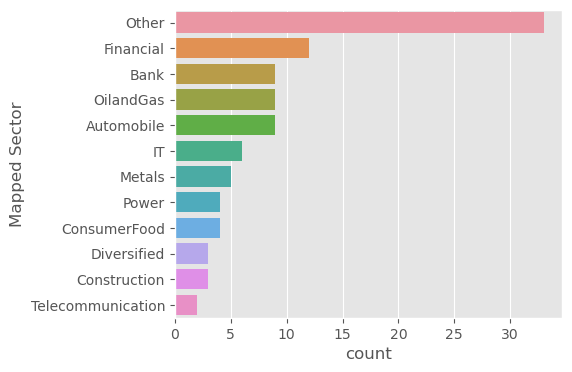

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(y='Mapped Sector', data=df, order=df['Mapped Sector'].value_counts().index)

plt.show()

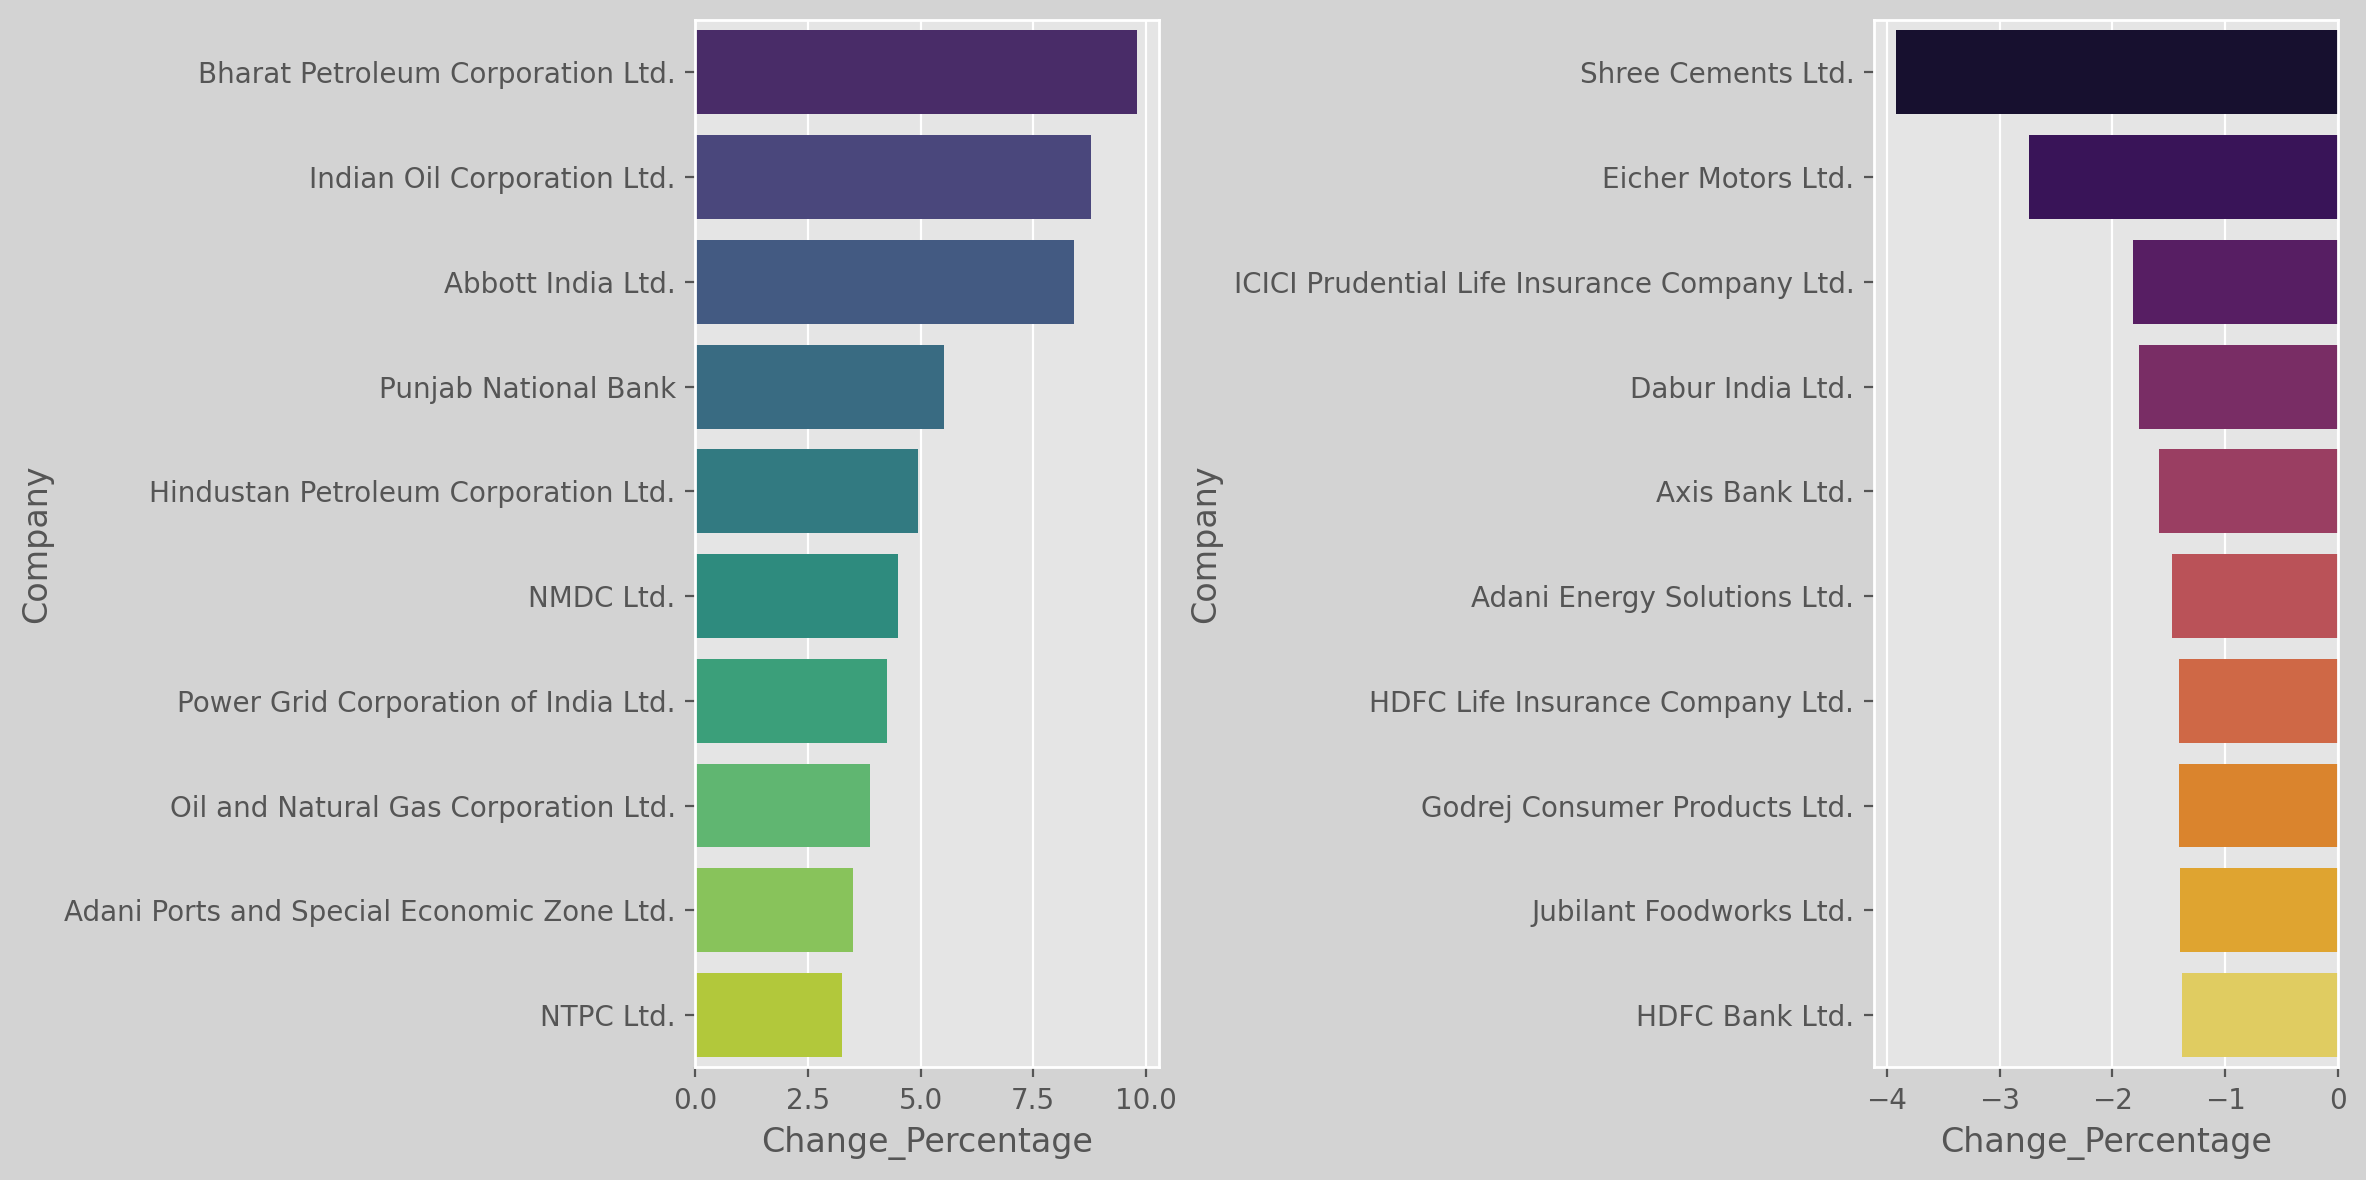

In [21]:
#Top gainer and lowser
t10 = df.nlargest(10, 'Change_Percentage')
l10 = df.nsmallest(10, 'Change_Percentage')

plt.figure(figsize=(12,6),dpi=200, facecolor='lightgrey')
plt.subplot(1, 2, 1)
sns.barplot(x='Change_Percentage',y='Company',data=t10, palette='viridis')

plt.subplot(1 , 2 ,2)
sns.barplot(x='Change_Percentage',y='Company',data=l10, palette='inferno')


plt.tight_layout()
plt.show()

        Mapped Sector  Change_Percentage
0          Automobile           0.290000
1                Bank           0.318889
2        Construction           0.593333
3        ConsumerFood           0.520000
4         Diversified           0.026667
5           Financial           0.380000
6                  IT           2.035000
7              Metals           2.754000
8           OilandGas           4.221111
9               Other           0.504848
10              Power           1.635000
11  Telecommunication          -0.665000


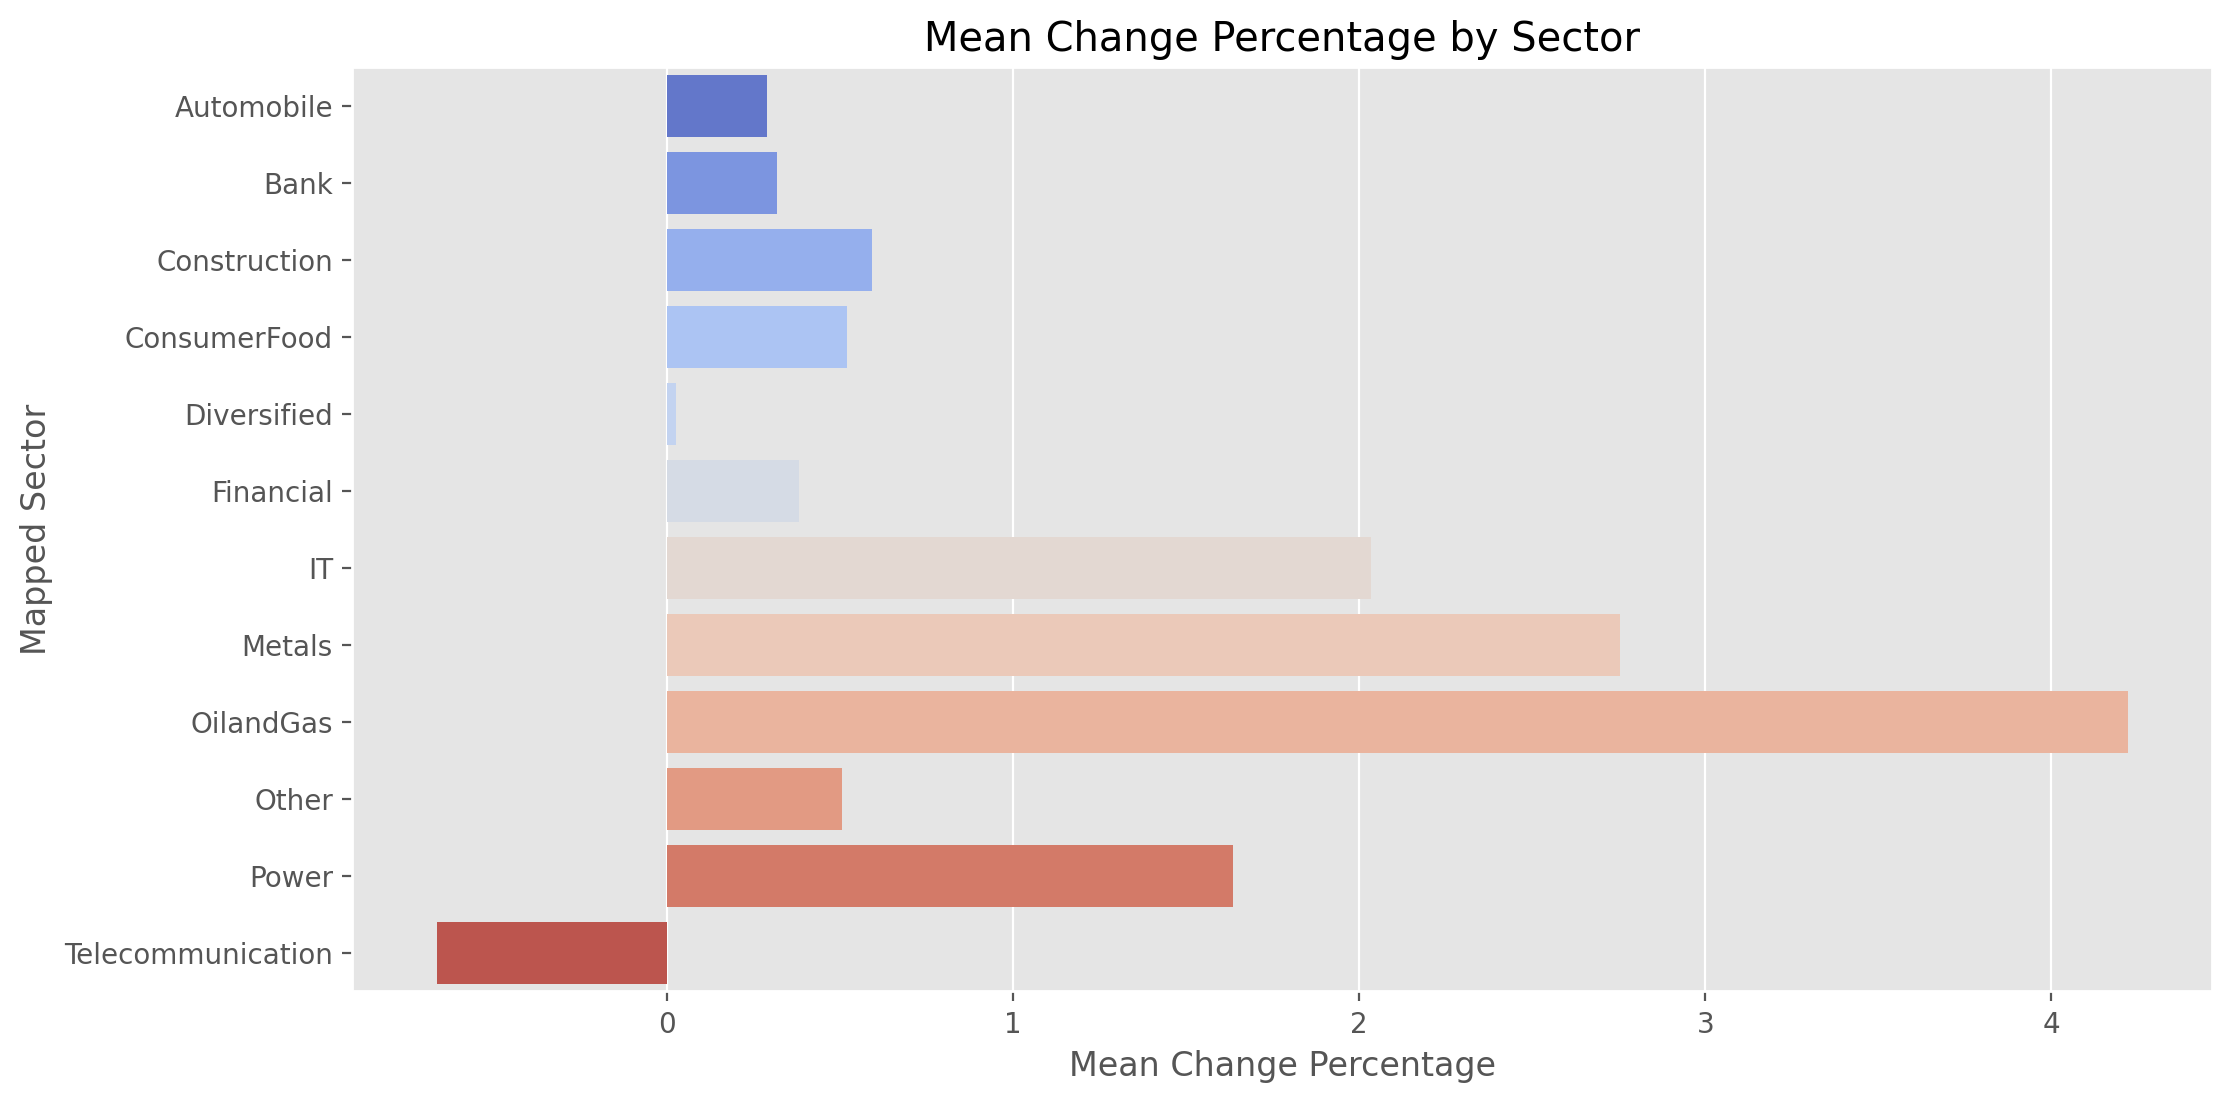

In [22]:
sec_perf = df.groupby('Mapped Sector')['Change_Percentage'].mean().reset_index()
print(sec_perf)
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x = 'Change_Percentage',y = 'Mapped Sector', data=sec_perf, palette='coolwarm')

plt.title('Mean Change Percentage by Sector')
plt.xlabel('Mean Change Percentage')
plt.ylabel('Mapped Sector')

plt.show()

        Mapped Sector       Volume
1                Bank  425510898.0
8           OilandGas  268942272.0
7              Metals  127910307.0
10              Power   68584592.0
9               Other   41476739.0
0          Automobile   28588409.0
11  Telecommunication   25580553.0
6                  IT   23603002.0
2        Construction   21504907.0
4         Diversified   17889807.0
5           Financial   17312027.0
3        ConsumerFood    7117085.0


<Figure size 640x480 with 0 Axes>

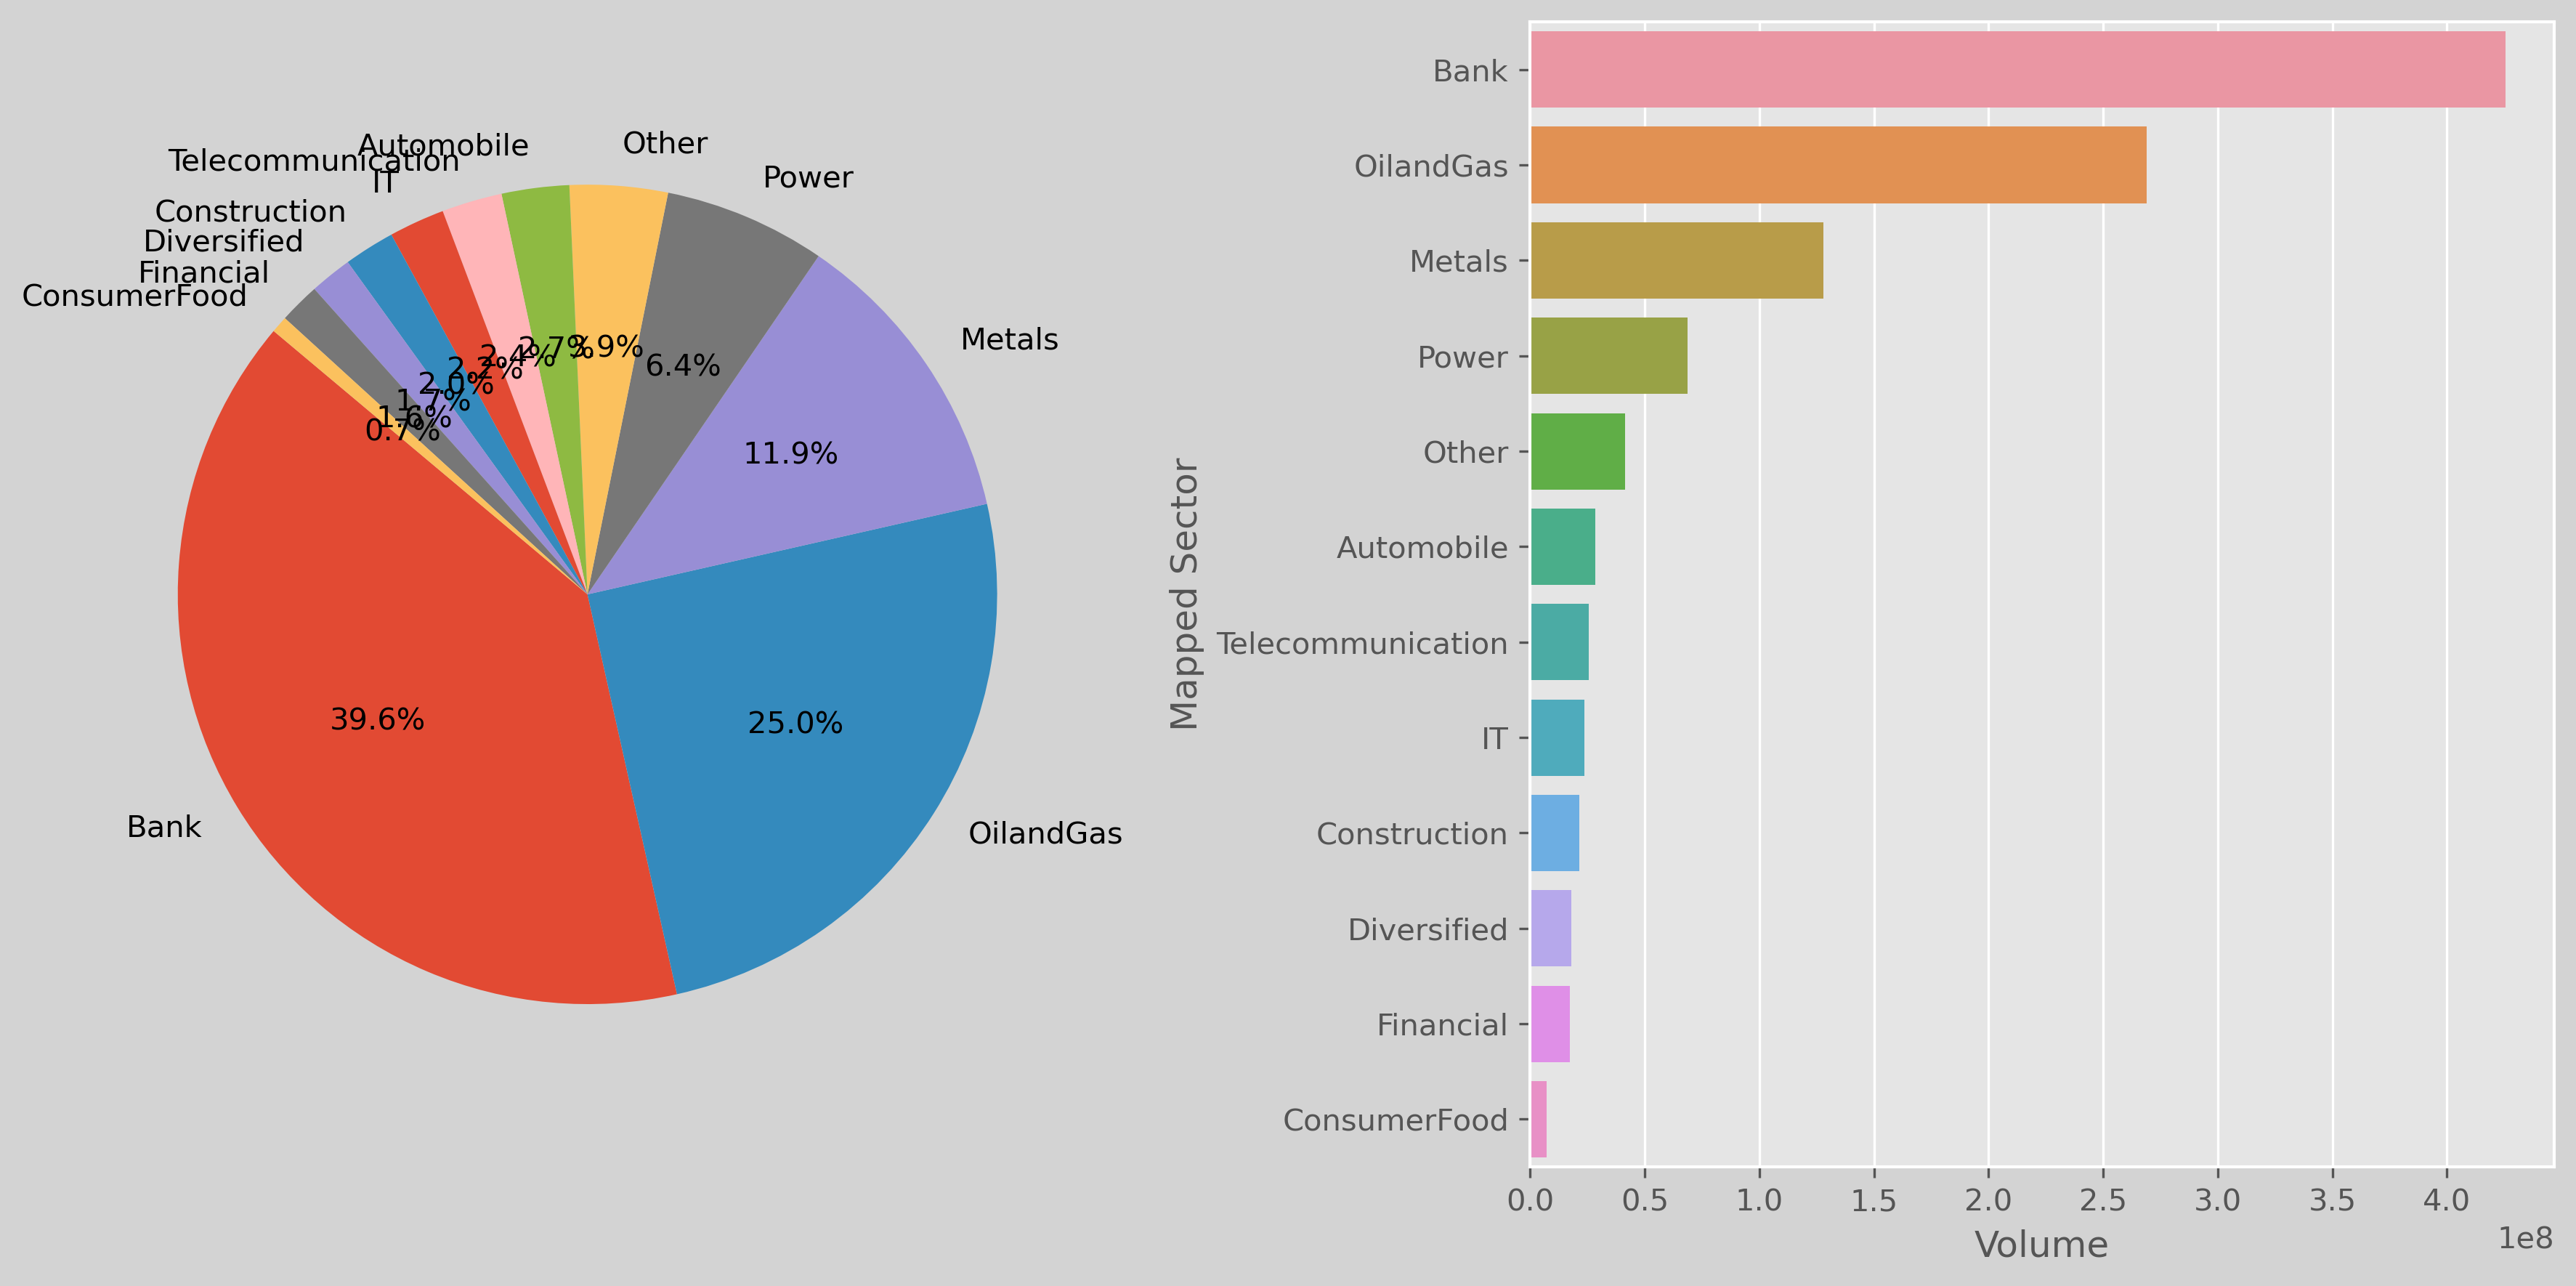

In [23]:
agg_vol = df.groupby('Mapped Sector')['Volume'].sum().reset_index()
agg_vol.sort_values('Volume', ascending=False, inplace=True)
print(agg_vol)
plt.suptitle('Total Volume per Sector')

plt.figure(figsize=(12,6), dpi=300, facecolor='lightgrey')
plt.subplot(1,2,1)
plt.pie(agg_vol['Volume'], labels = agg_vol['Mapped Sector'],autopct="%1.1f%%", startangle=140)

plt.subplot(1,2,2)
sns.barplot(x='Volume',y='Mapped Sector',data=agg_vol)

plt.tight_layout()
plt.show()

Certainly! Based on the provided data and the analysis performed, here is a summary of the assignment:

### Assignment Summary:

#### 1. **Data Cleaning:**
   - The dataset was cleaned by handling missing values and converting necessary columns to appropriate data types.
   - The 'Changes' column was split into 'Change_Value' and 'Change_Percentage'.

#### 2. **Sector Mapping:**
   - A mapping function (`map_sector`) was created to group similar sectors together.
   - The 'Mapped Sector' column was created using this mapping function.

#### 3. **Sector Reduction:**
   - Certain sectors with similar characteristics were grouped together, reducing the number of unique sectors.

#### 4. **Top Gainers and Losers:**
   - The top 10 gainers and losers based on the 'Change_Percentage' column were visualized using bar plots.

#### 5. **Sector Analysis:**
   - Total volume per sector and the mean change percentage by sector were analyzed.
   - Pie charts and bar plots were used to visualize volume and mean change percentage, respectively.

#### 6. **Count Plot:**
   - A count plot was created to show the distribution of companies across mapped sectors.

#### 7. **Data Mapping Function:**
   - The data mapping function was defined to categorize sectors into broader categories for better analysis.

#### 8. **Miscellaneous Sectors:**
   - Sectors like 'Diamond&Jewellery', 'Diversifiedchemicals', etc., were grouped into the 'Other' category.

#### 9. **Visualization:**
   - Various visualizations were used, including pie charts, bar plots, and count plots, to represent different aspects of the data.

#### 10. **Conclusion:**
   - The analysis provides insights into the distribution of companies across sectors, top gainers and losers, and overall sector performance.

This summary provides an overview of the key steps taken in the assignment. If you have specific questions or if there's anything else you'd like to know, feel free to ask!